In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/raw.csv')

In [3]:
df.head()

,Gender,Race_Ethnicity,Parental_Level_O,Test_prep,lunch,Math_score,Reading_Score,Writing_Score
0,Female,Group B,Bachelor's Degre Standard,NaN,Standard,72,72,74
1,Male,Group C,some college,Complete,Standard,69,90,88
2,Female,Group A,master's degree,NaN,Standard,90,95,93
3,Male,Group B,associate's degree,NaN,free/reduced,47,97,44
4,Female,Group C,high school,NaN,Standard,76,78,75


In [4]:
df.shape

(35, 8)

In [5]:
df.isnull().sum()

Gender               0
Race_Ethnicity       0
Parental_Level_O     0
Test_prep           26
lunch                0
Math_score           0
Reading_Score        0
Writing_Score        0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

Gender              0
Race_Ethnicity      0
Parental_Level_O    0
Test_prep           0
lunch               0
Math_score          0
Reading_Score       0
Writing_Score       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1 to 32
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            9 non-null      object
 1   Race_Ethnicity    9 non-null      object
 2   Parental_Level_O  9 non-null      object
 3   Test_prep         9 non-null      object
 4   lunch             9 non-null      object
 5   Math_score        9 non-null      int64 
 6   Reading_Score     9 non-null      int64 
 7   Writing_Score     9 non-null      int64 
dtypes: int64(3), object(5)
memory usage: 648.0+ bytes


In [10]:
df.nunique()

Gender              2
Race_Ethnicity      3
Parental_Level_O    4
Test_prep           1
lunch               2
Math_score          8
Reading_Score       8
Writing_Score       8
dtype: int64

In [11]:
df.describe()

,Math_score,Reading_Score,Writing_Score
count,9.000000,9.000000,9.000000
mean,65.444444,64.000000,66.777778
std,22.294120,16.583124,17.354954
min,32.000000,47.000000,39.000000
25%,56.000000,52.000000,62.000000
50%,64.000000,58.000000,63.000000
75%,85.000000,83.000000,81.000000
max,99.000000,90.000000,92.000000


In [12]:
df.head()

,Gender,Race_Ethnicity,Parental_Level_O,Test_prep,lunch,Math_score,Reading_Score,Writing_Score
1,Male,Group C,some college,Complete,Standard,69,90,88
6,Female,Group B,some college,Complete,Standard,88,83,92
8,Female,Group A,associate's degree,Complete,Standard,64,83,39
11,Male,Group A,some college,Complete,free/reduced,40,60,50
16,Male,Group A,master's degree,Complete,Standard,56,53,81


In [13]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Race_Ethnicity' variable:  ",end=" ")
print(df['Race_Ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['Parental_Level_O'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['Test_prep'].unique())

Categories in 'Gender' variable:      ['Male' 'Female']
Categories in 'Race_Ethnicity' variable:   ['Group C' 'Group B' 'Group A']
Categories in'parental level of education' variable: ['some college' "associate's degree" "master's degree"
 "Bachelor's Degre Standard"]
Categories in 'lunch' variable:      ['Standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['Complete']


In [14]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Math_score', 'Reading_Score', 'Writing_Score']

We have 5 categorical features : ['Gender', 'Race_Ethnicity', 'Parental_Level_O', 'Test_prep', 'lunch']


In [15]:
df.head(2)

,Gender,Race_Ethnicity,Parental_Level_O,Test_prep,lunch,Math_score,Reading_Score,Writing_Score
1,Male,Group C,some college,Complete,Standard,69,90,88
6,Female,Group B,some college,Complete,Standard,88,83,92


In [16]:
df['total score'] = df['Math_score'] + df['Reading_Score'] + df['Writing_Score']
df['average'] = df['total score']/3
df.head()

,Gender,Race_Ethnicity,Parental_Level_O,Test_prep,lunch,Math_score,Reading_Score,Writing_Score,total score,average
1,Male,Group C,some college,Complete,Standard,69,90,88,247,82.333333
6,Female,Group B,some college,Complete,Standard,88,83,92,263,87.666667
8,Female,Group A,associate's degree,Complete,Standard,64,83,39,186,62.000000
11,Male,Group A,some college,Complete,free/reduced,40,60,50,150,50.000000
16,Male,Group A,master's degree,Complete,Standard,56,53,81,190,63.333333


In [17]:
reading_full = df[df['Reading_Score']==100]['average'].count()
writing_full = df[df['Writing_Score']==100]['average'].count()
Math_full = df[df['Math_score']==100]['average'].count()

print(f'Number of student with full marks in Maths: {Math_full}')
print(f'Number of student with full marks in writing: {writing_full}')
print(f'Number of student with full marks in reading: {reading_full}')


Number of student with full marks in Maths: 0
Number of student with full marks in writing: 0
Number of student with full marks in reading: 0


In [18]:
reading_less = df[df['Reading_Score']<= 20]['average'].count()
writing_less = df[df['Writing_Score']<= 20]['average'].count()
Math_less = df[df['Math_score']<= 20 ]['average'].count()

print(f'Number of student with less than 20 marks in Maths: {reading_less}')
print(f'Number of student with less than 20 marks in Maths: {writing_less}')
print(f'Number of student with less than 20 marks in Maths: {Math_less}')

Number of student with less than 20 marks in Maths: 0
Number of student with less than 20 marks in Maths: 0
Number of student with less than 20 marks in Maths: 0


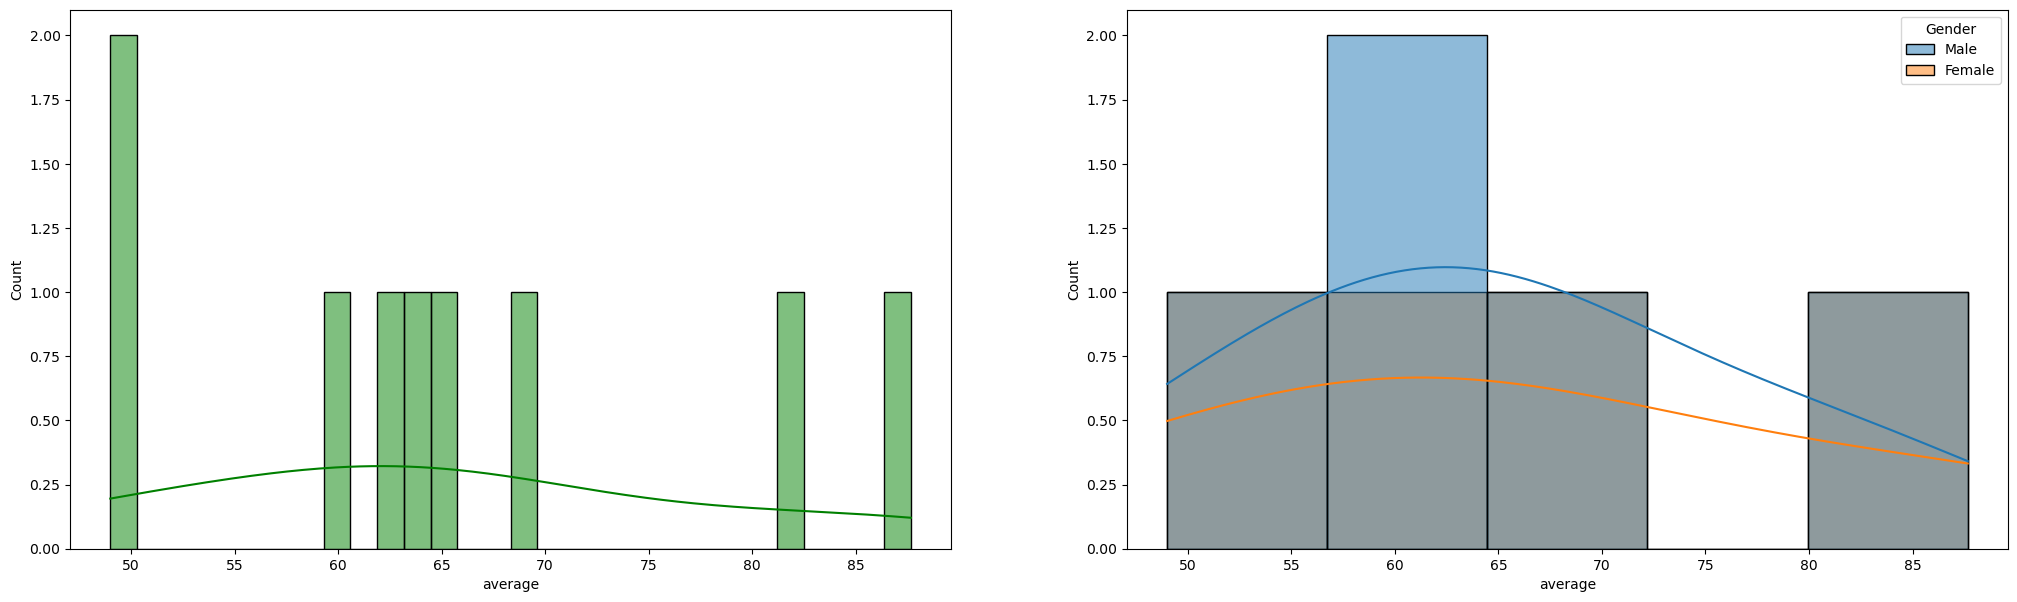

In [19]:
fig,axs = plt.subplots(1,2, figsize=(25,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='Gender')
plt.show()

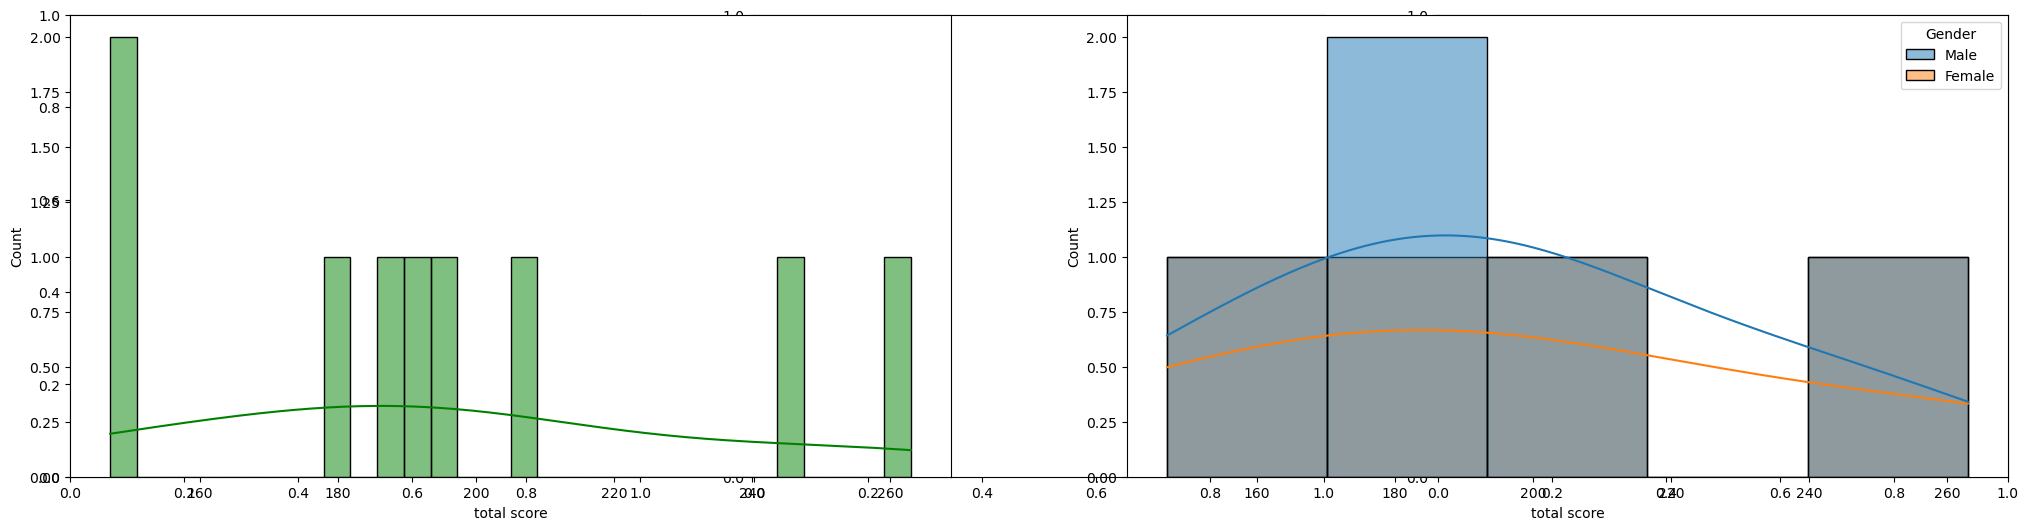

In [20]:
fig,axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='Gender')
plt.show()

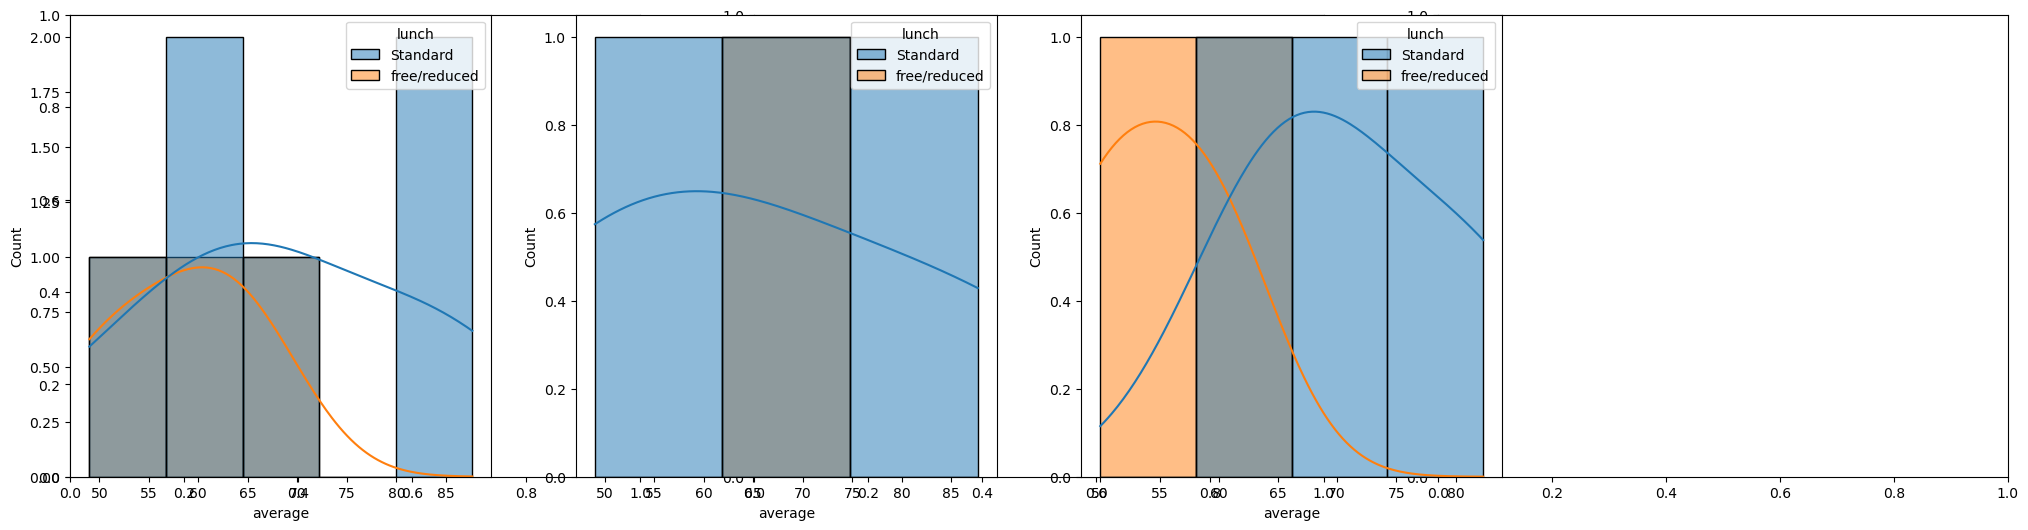

In [21]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='lunch')
plt.show()

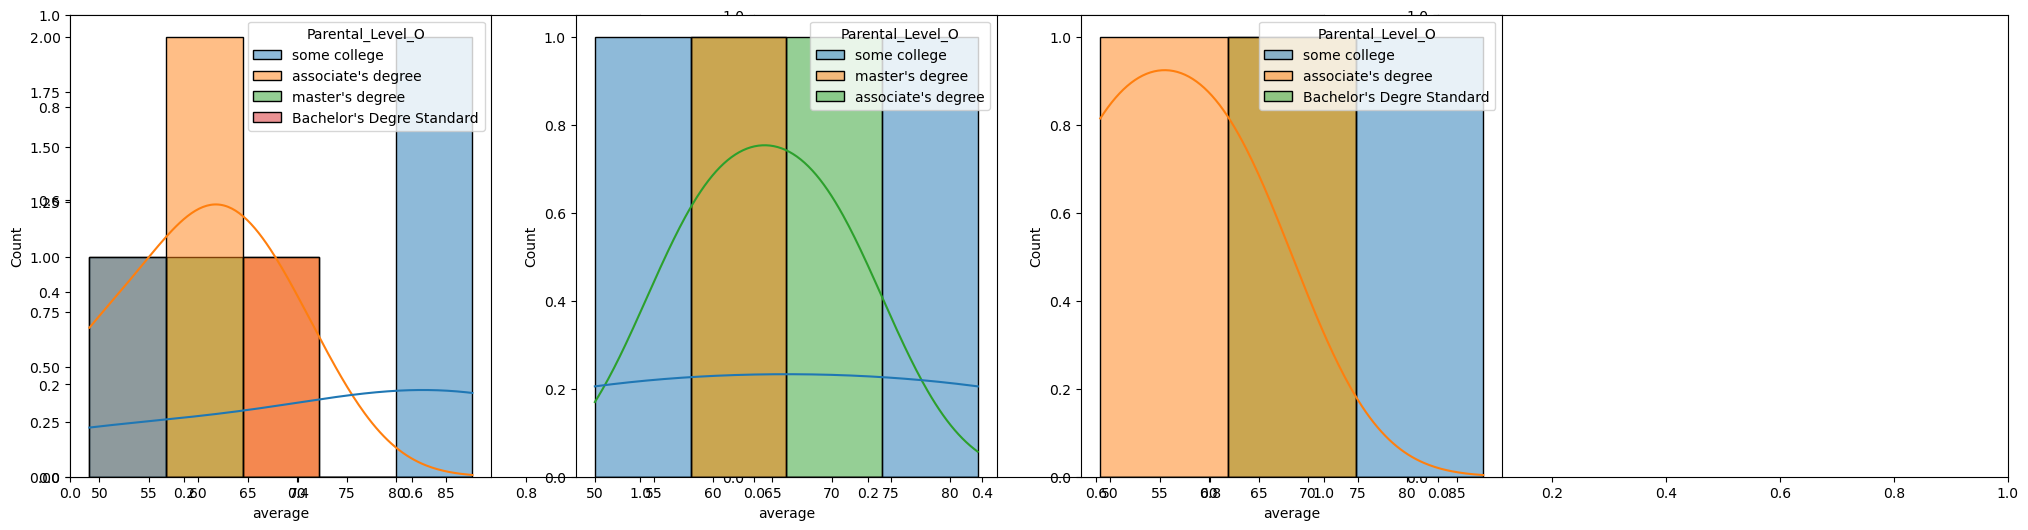

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='Parental_Level_O')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='Parental_Level_O')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='Parental_Level_O')
plt.show()

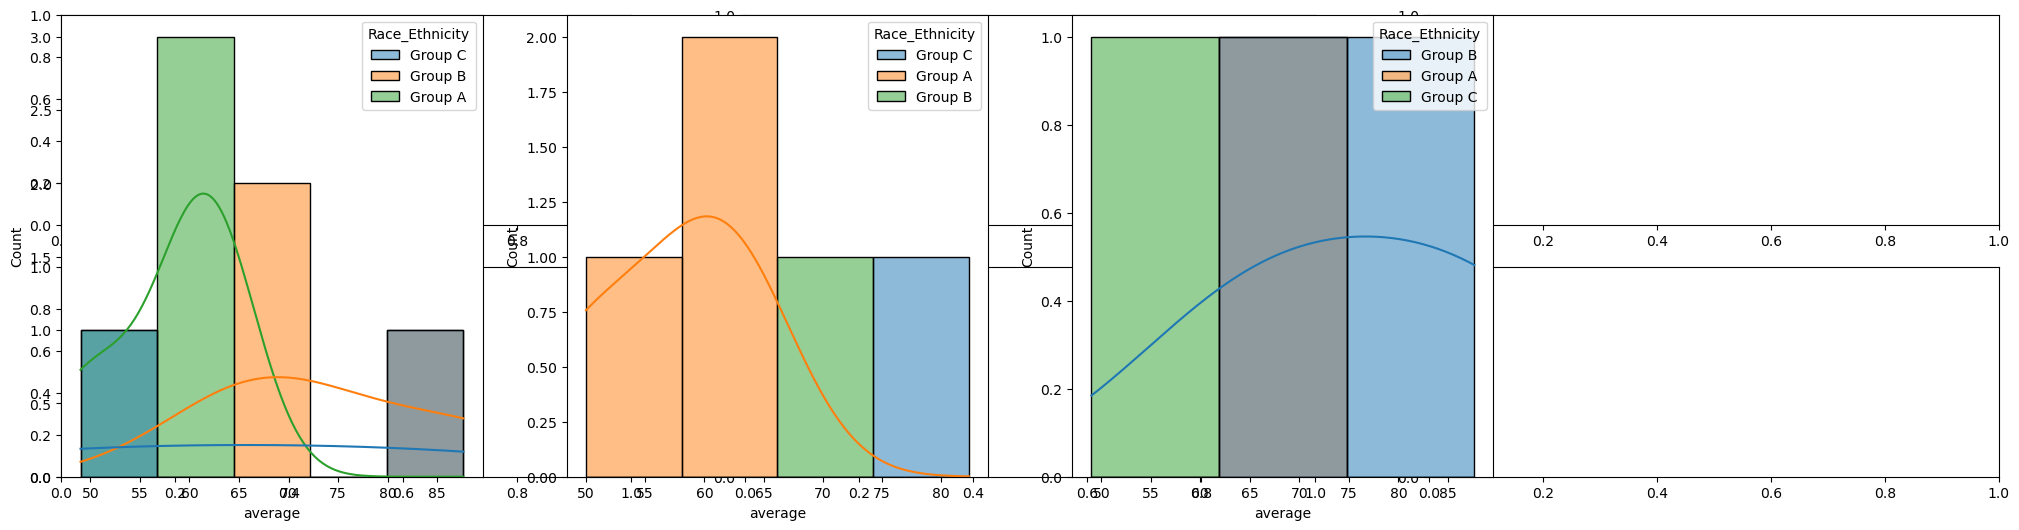

In [23]:
plt.subplots(2,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='Race_Ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.Gender=='Male'],x='average',kde=True,hue='Race_Ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.Gender=='Female'],x='average',kde=True,hue='Race_Ethnicity')
plt.show()


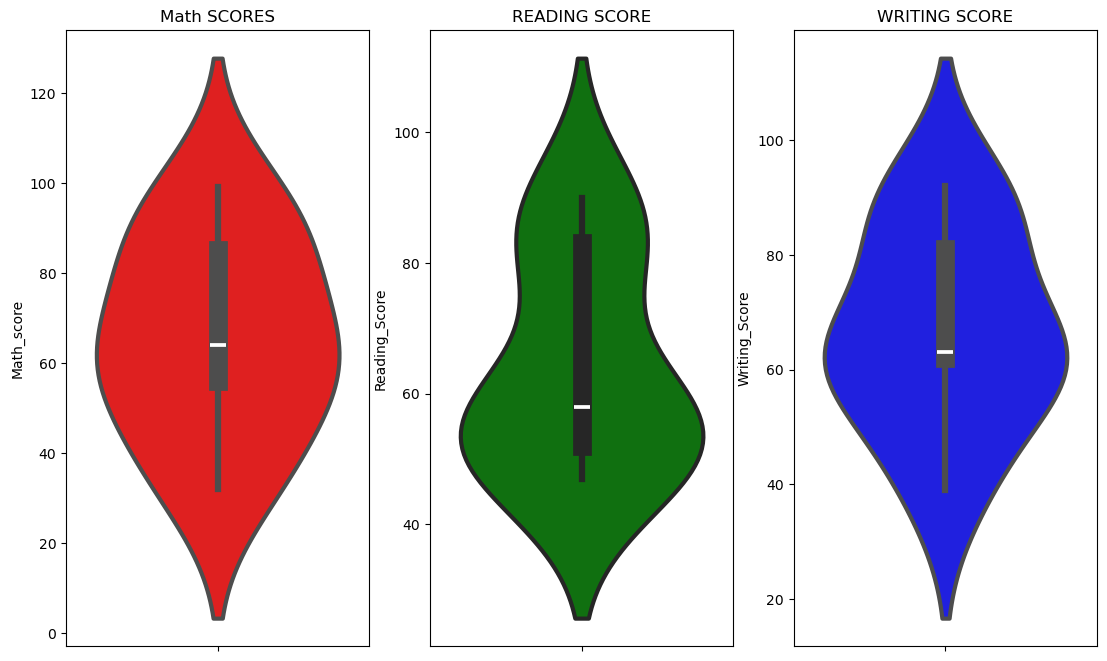

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math SCORES')
sns.violinplot(y='Math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='Reading_Score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='Writing_Score',data=df,color='blue',linewidth=3)
plt.show()

In [25]:
df.head()

,Gender,Race_Ethnicity,Parental_Level_O,Test_prep,lunch,Math_score,Reading_Score,Writing_Score,total score,average
1,Male,Group C,some college,Complete,Standard,69,90,88,247,82.333333
6,Female,Group B,some college,Complete,Standard,88,83,92,263,87.666667
8,Female,Group A,associate's degree,Complete,Standard,64,83,39,186,62.000000
11,Male,Group A,some college,Complete,free/reduced,40,60,50,150,50.000000
16,Male,Group A,master's degree,Complete,Standard,56,53,81,190,63.333333


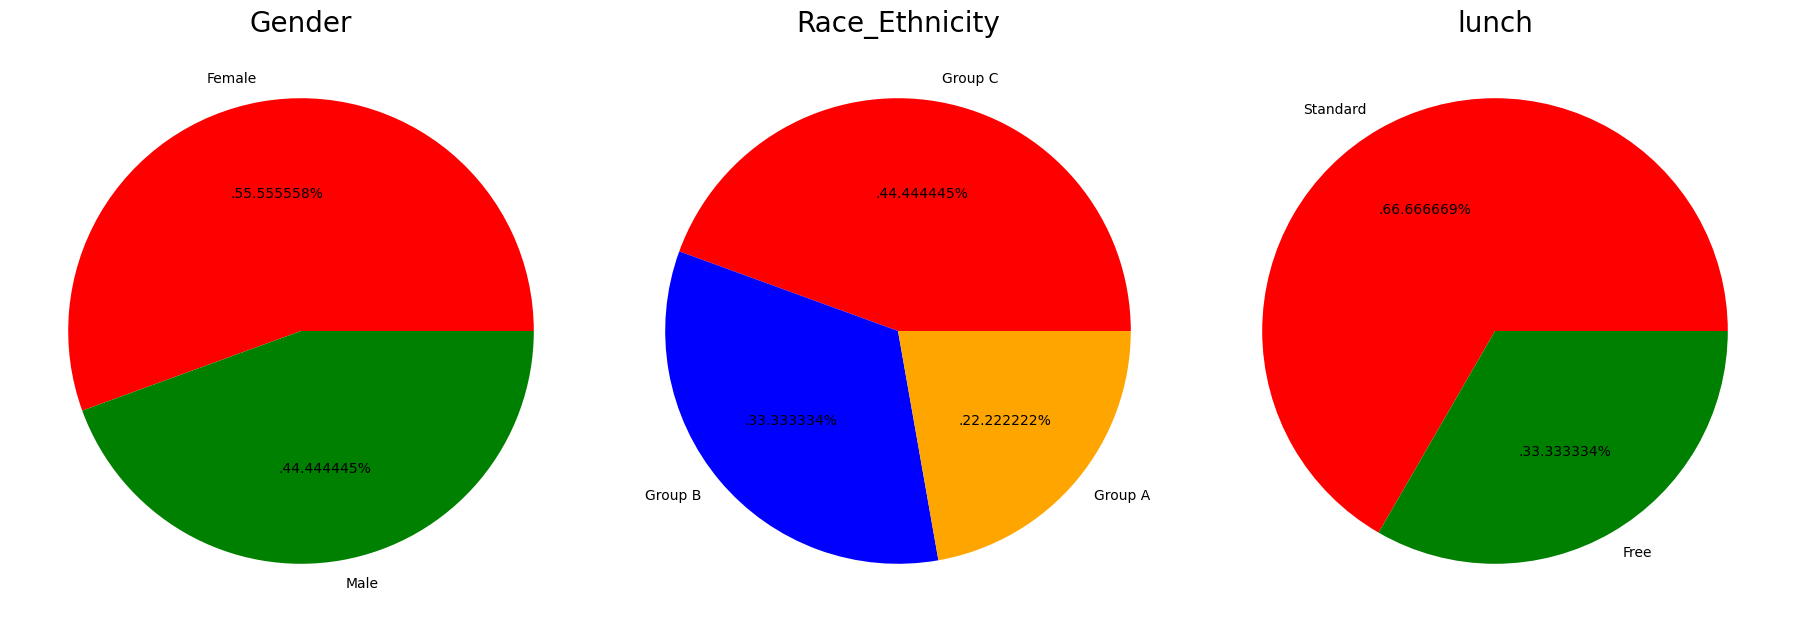

In [26]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Race_Ethnicity'].value_counts()
labels = 'Group C','Group B','Group A'
color = ['red', 'blue','orange']

plt.pie(size, colors = color,labels = labels,autopct ='.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')
'''
plt.subplot(1, 5, 4)
size = df['Test_prep'].value_counts()
labels = 'None','Complete'
color = ['red','blue']

plt.pie(size,colors=color,labels = labels,autopct='.%2f%%')
plt.title('Test_prep', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['Parental_Level_O'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Level_O', fontsize = 20)
plt.axis('off')

'''
plt.tight_layout()
plt.grid()

plt.show()

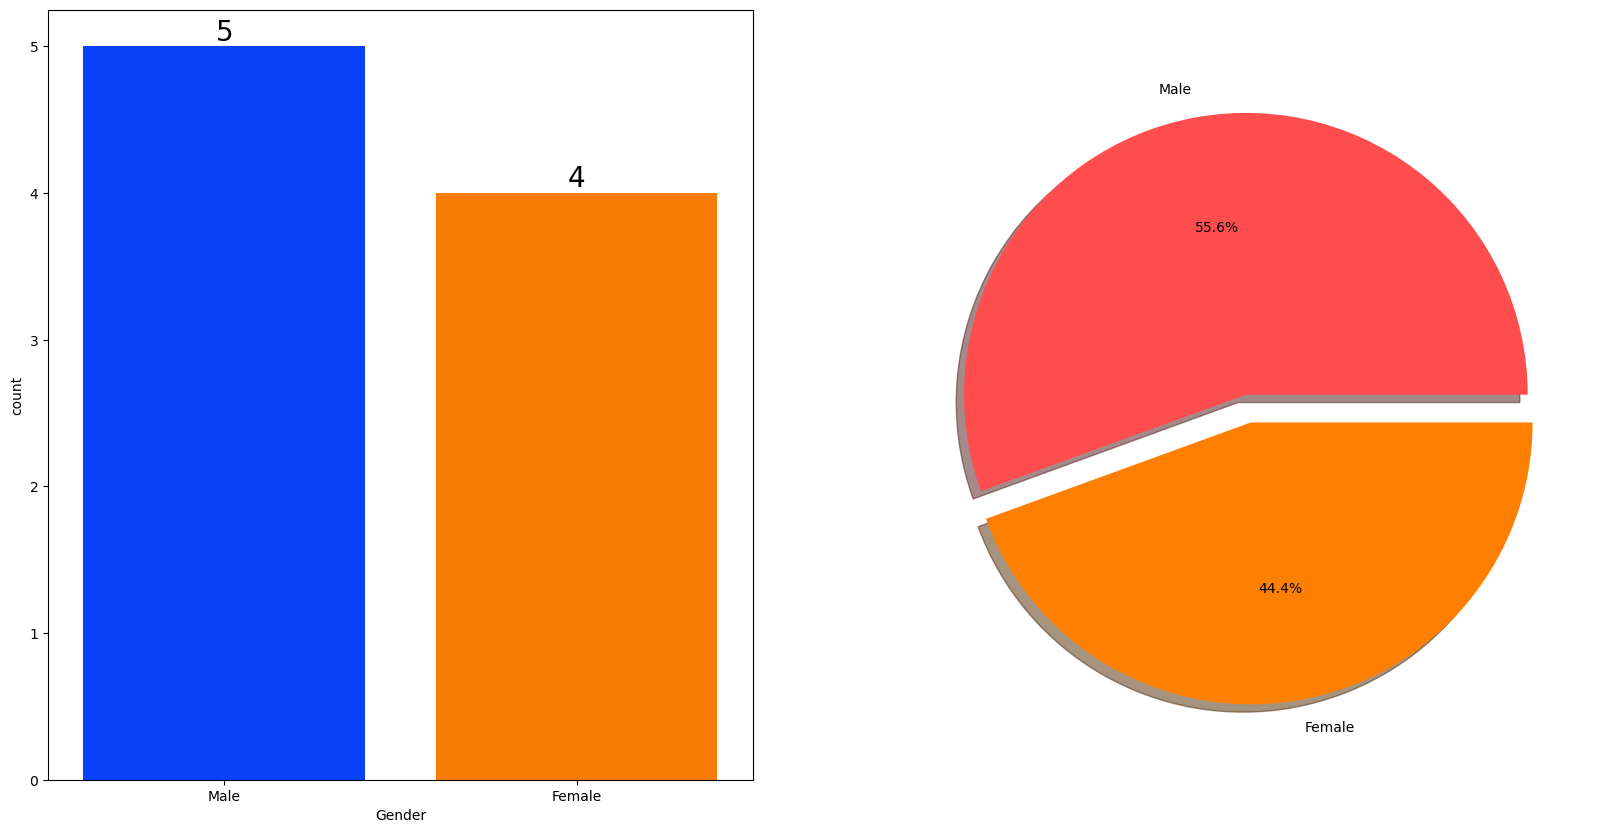

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [28]:
gender_group = df.groupby('Gender').mean(2)
gender_group

,Math_score,Reading_Score,Writing_Score,total score,average
Gender,,,,,
Female,67.25,67.0,64.0,198.25,66.083333
Male,64.00,61.6,69.0,194.60,64.866667


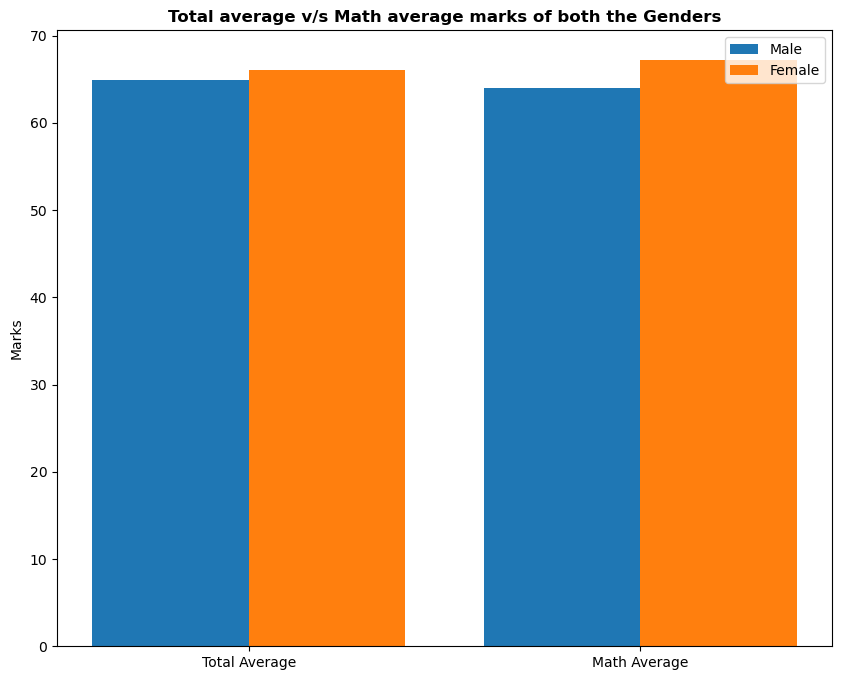

In [29]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


Female_scores = [gender_group['average'][0], gender_group['Math_score'][0]]
Male_scores = [gender_group['average'][1], gender_group['Math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, Female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the Genders", fontweight='bold')
plt.legend()
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Race_Ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Race_Ethnicity'].value_counts(),labels=df['Race_Ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

In [50]:
Group_data2=df.groupby('Race_Ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['Math_score'].mean().index,y=Group_data2['Math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Reading_Score'].mean().index,y=Group_data2['Reading_Score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Writing_Score'].mean().index,y=Group_data2['Writing_Score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

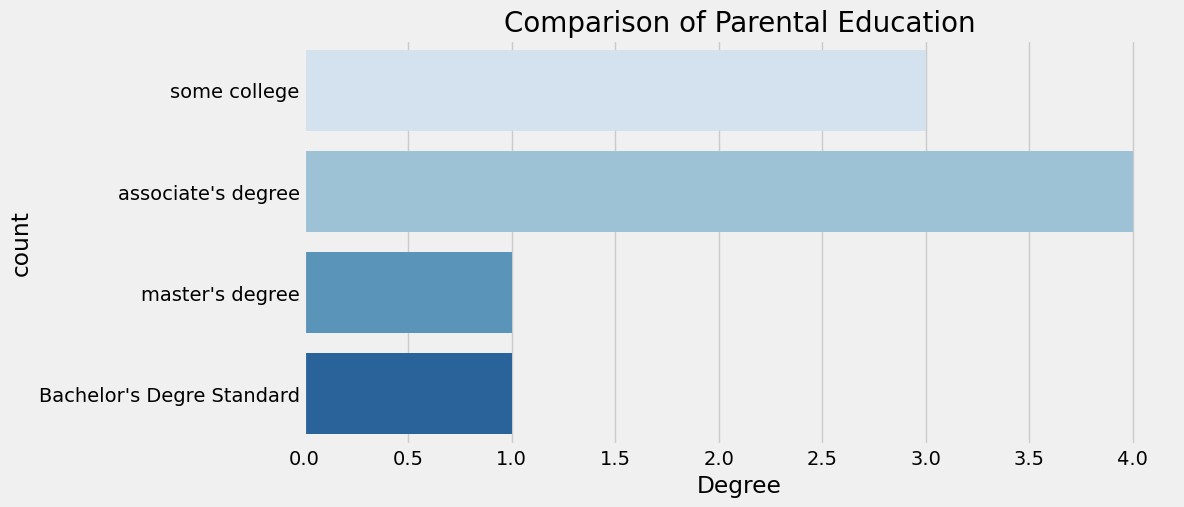

In [49]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
sns.countplot(df['Parental_Level_O'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [ ]:
df.groupby('Parental_Level_O').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['Parental_Level_O'],data=df,palette = 'bright',hue='Test_prep',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['Parental_Level_O'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['Math_score'], hue=df['Test_prep'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['Reading_Score'], hue=df['Test_prep'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['Writing_Score'], hue=df['Test_prep'])

<Axes: xlabel='lunch', ylabel='Writing_Score'>

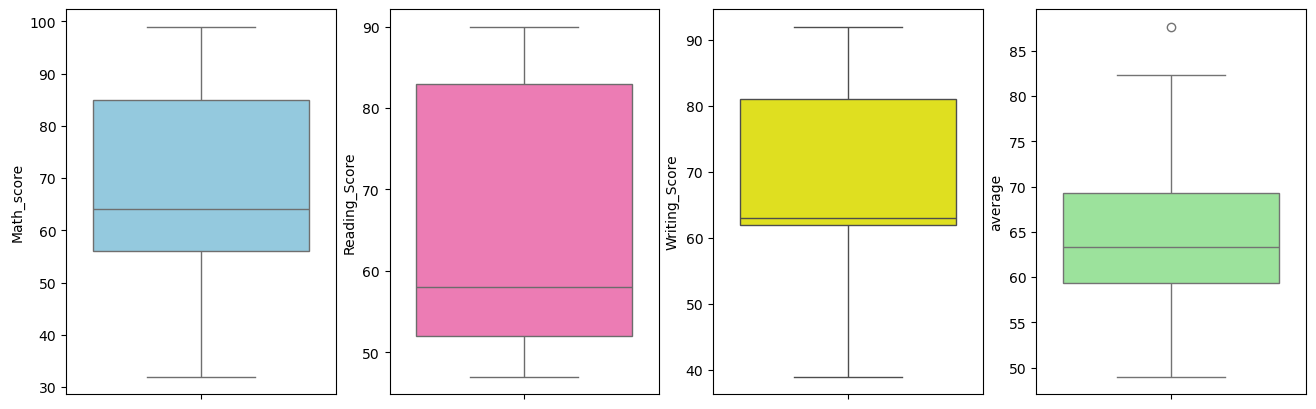

In [32]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['Reading_Score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['Writing_Score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

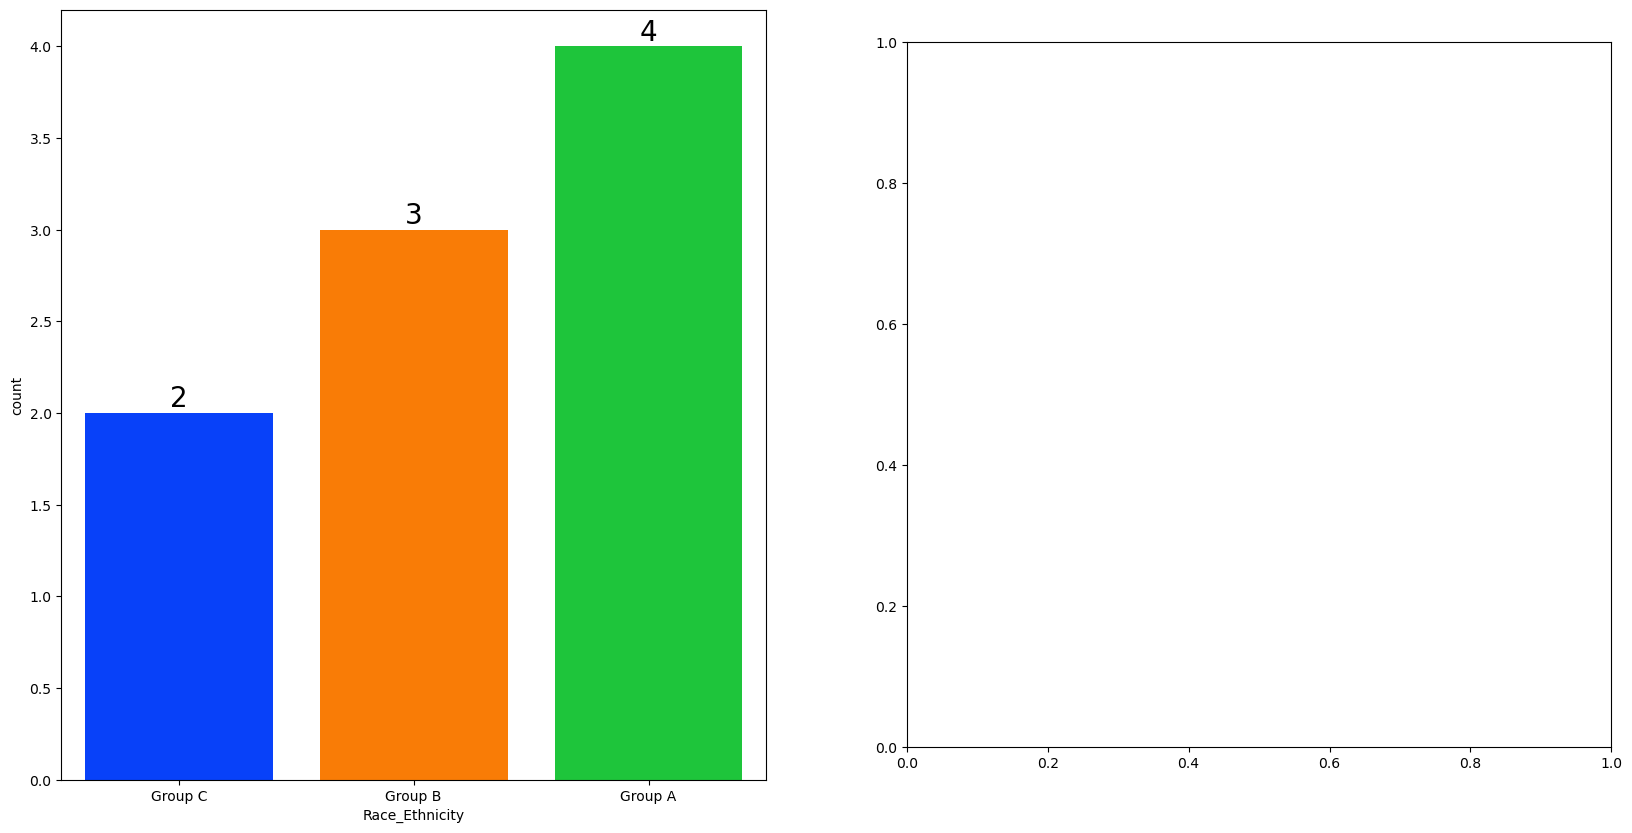

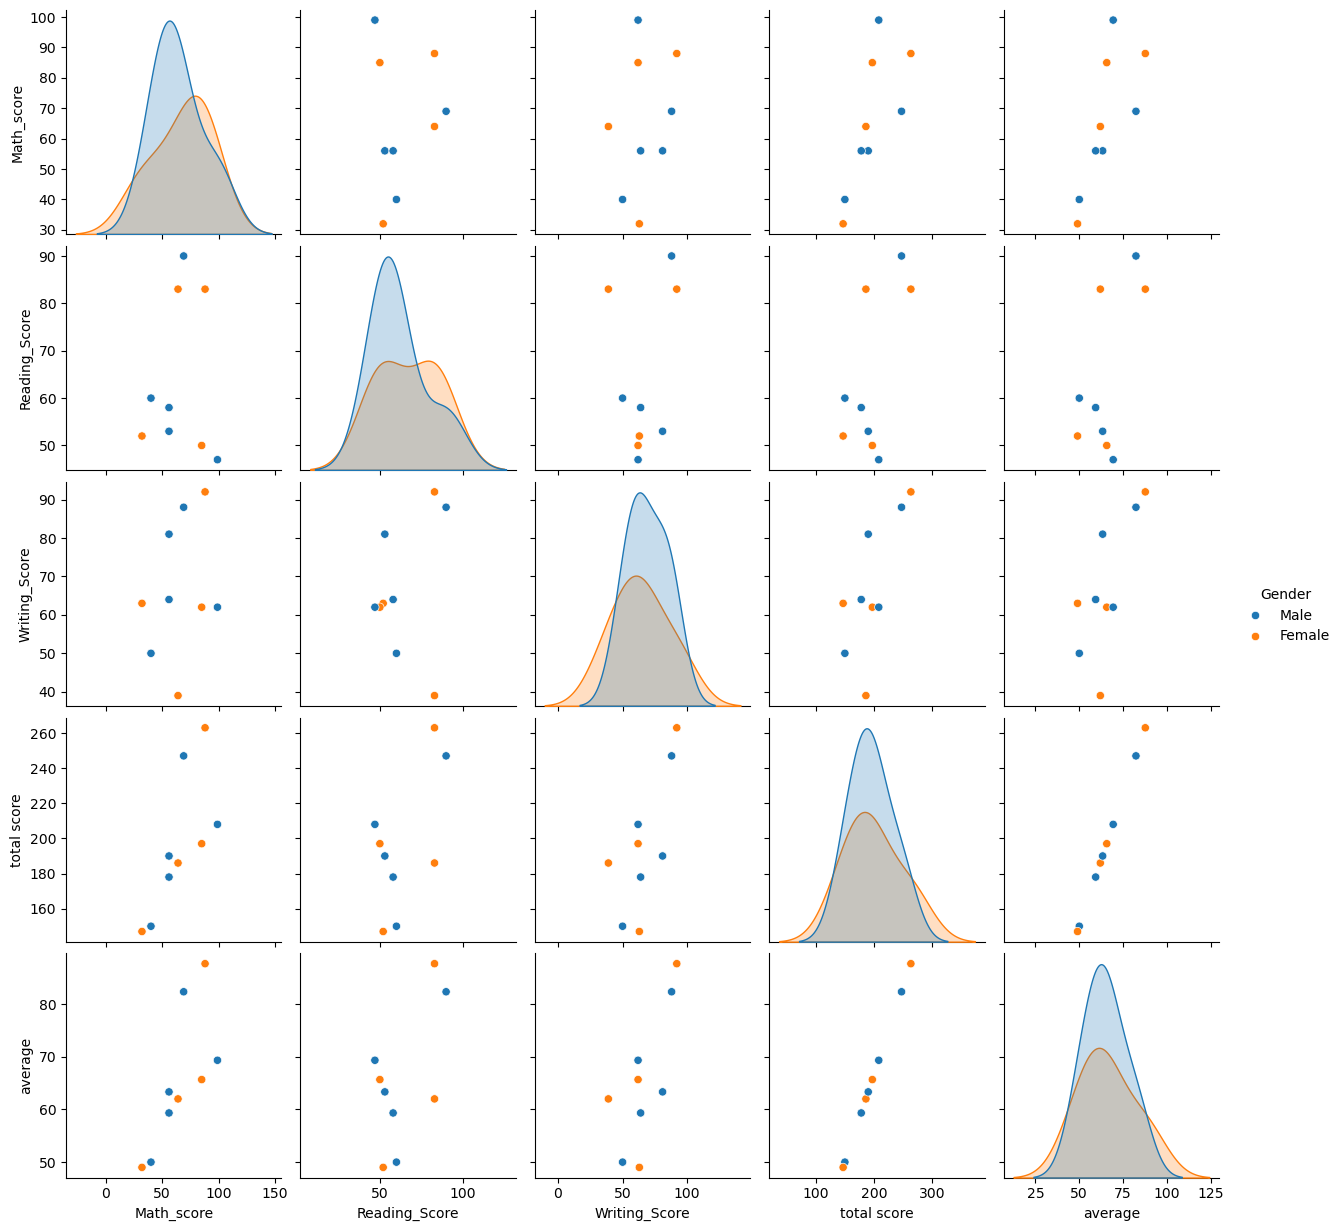

In [31]:
sns.pairplot(df,hue = 'Gender')
plt.show()